# Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [49]:
raw_data = pd.read_csv('dataset/customer_shopping_data.csv')

In [50]:
raw_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# Data Cleaning

In [51]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [52]:
# Check for duplicated rows
raw_data.duplicated().sum()

0

In [53]:
# Check for Null Values (NaN)
raw_data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [54]:
raw_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [55]:
# Copy the Data
data = raw_data.copy()

# Change invoice date column into date time format
data['invoice_date'] = pd.to_datetime(data['invoice_date'],  format='%d/%m/%Y')

In [56]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [57]:
# Make Sales column by multiplying quantity with price
data['sales'] = data['quantity']*data['price']

# Since the currency that used in dataset is Turkish Lira
data['sales_usd'] = data['sales']*0.029

In [58]:
# Make year and month filter
data['year'] = data['invoice_date'].dt.year
data['month'] = data['invoice_date'].dt.month

In [59]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,sales_usd,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,217.55800,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,156.64437,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,8.70232,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,435.12325,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,7.02960,2021,10


In [60]:
# Make function to calculate sum and mean
def agg_sum(x):
    sum = x.sum()  # Replace with your custom aggregation logic, e.g., x.mean() or x.sum()
    return sum

def agg_mean(x):
    mean = x.mean()  # Replace with your custom aggregation logic, e.g., x.mean() or x.sum()
    return mean

# Group the data by year and month
custom_grouped = data.groupby(['year','month'])['sales_usd'].agg(agg_sum)
custom_grouped

year  month
2021  1        279606.82398
      2        254397.14138
      3        274205.42202
      4        272296.70466
      5        283380.95213
      6        269301.86915
      7        299022.47072
      8        279289.01530
      9        266456.80298
      10       297627.43674
      11       268701.10341
      12       277970.80464
2022  1        283165.02306
      2        241979.24568
      3        289613.86964
      4        270458.18876
      5        288479.64977
      6        279777.61455
      7        291960.48555
      8        279899.46211
      9        278621.24941
      10       298180.18573
      11       259305.95514
      12       286226.67892
2023  1        275082.39507
      2        275751.22584
      3         72910.25691
Name: sales_usd, dtype: float64

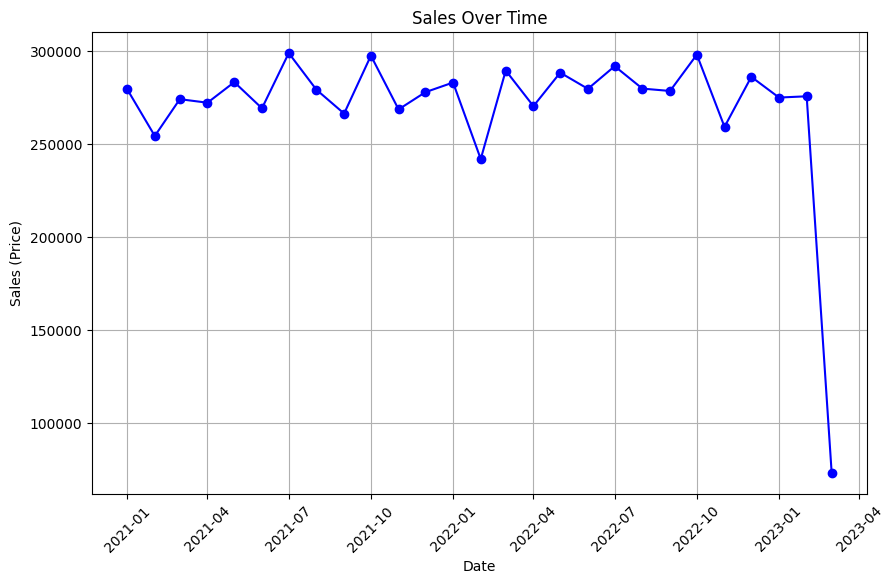

In [61]:
custom_grouped = custom_grouped.reset_index()

# Create a 'Date' column from 'year' and 'month'
custom_grouped['Date'] = pd.to_datetime(custom_grouped[['year', 'month']].assign(DAY=1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(custom_grouped['Date'], custom_grouped['sales_usd'], marker='o', color='blue')

# Add titles and labels
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (Price)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [67]:
# Remove the data above 2023 March
data = data[data['invoice_date'] <= '2023-03-01']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,sales_usd,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,217.55800,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,156.64437,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,8.70232,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,435.12325,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,7.02960,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,8.50425,2022,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,0.60668,2021,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,0.60668,2021,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,487.20000,2021,3


In [63]:
# Select only the required columns for Prophet
df_filtered = data[['invoice_date', 'sales_usd']]
df_filtered.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 98593 entries, 0 to 99456
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_date  98593 non-null  datetime64[ns]
 1   sales_usd     98593 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


In [64]:
# Set 'invoice_date' as the index for resampling
df_filtered.set_index('invoice_date', inplace=True)

# Aggregate sales by month
monthly_df = df_filtered.resample('M').sum()

monthly_df = monthly_df.reindex(pd.date_range(monthly_df.index.min(), monthly_df.index.max(), freq='M'), fill_value=0)
monthly_df = monthly_df.reset_index()

/var/folders/nr/p6b7qgnd5ync988bnbxs4kg40000gn/T/ipykernel_35185/1446888126.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df_filtered.resample('M').sum()
/var/folders/nr/p6b7qgnd5ync988bnbxs4kg40000gn/T/ipykernel_35185/1446888126.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = monthly_df.reindex(pd.date_range(monthly_df.index.min(), monthly_df.index.max(), freq='M'), fill_value=0)


In [65]:
monthly_df.tail()

,index,sales_usd
22,2022-11-30,259305.95514
23,2022-12-31,286226.67892
24,2023-01-31,275082.39507
25,2023-02-28,275751.22584
26,2023-03-31,6868.35594


In [68]:
# Rename for Prophet
monthly_df.columns = ['ds', 'y']

In [69]:
monthly_df.head()

,ds,y
0,2021-01-31,279606.82398
1,2021-02-28,254397.14138
2,2021-03-31,274205.42202
3,2021-04-30,272296.70466
4,2021-05-31,283380.95213


# Forecast Sales for Every Month

In [75]:
from prophet import Prophet

# Fit the model
model = Prophet()
model.fit(monthly_df)

# Predict future sales
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

11:09:45 - cmdstanpy - INFO - Chain [1] start processing


11:09:45 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [71]:
# View the predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds           yhat     yhat_lower     yhat_upper
0  2021-01-31  276592.294890  242902.533380  309383.452280
1  2021-02-28  238407.992551  205491.034359  271234.945507
2  2021-03-31  315977.500228  279420.663328  347848.353162
3  2021-04-30  261593.849931  227968.946741  292654.293197
4  2021-05-31  278560.827019  242597.829170  310829.990177
5  2021-06-30  271545.961017  238905.486790  306339.990633
6  2021-07-31  307433.886748  275046.802835  338627.762331
7  2021-08-31  292707.528963  261300.122668  325212.027783
8  2021-09-30  281387.173242  249240.243925  312946.355026
9  2021-10-31  310068.883343  278453.465917  342425.550169
10 2021-11-30  275448.023253  243044.794770  307039.104387
11 2021-12-31  277317.800100  246675.122517  310810.998153
12 2022-01-31  279304.944338  244519.035129  311592.390429
13 2022-02-28  257974.913896  225914.020759  291441.961263
14 2022-03-31  190238.192425  159265.283330  225301.483301
15 2022-04-30  281219.135371  246163.328358  312130.2101

#### For Reference
 - "ds" is the month of the sale.

 - "yhat" is the predicted sales value (or central estimate) for each time period.

 - "yhat_lower" is the lower end of the uncertainty interval. It represents a more conservative forecast, suggesting the minimum expected value within the specified confidence level.
 
- "yhat_upper" The upper end of the uncertainty interval. It indicates the maximum expected value within the same confidence level.

In [72]:
# Filter the forecast to show only predictions for 2023
forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

# View the predictions
print(forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds           yhat     yhat_lower     yhat_upper
24 2023-01-31  281919.841460  250493.467740  313732.906845
25 2023-02-28  275797.996734  244508.974413  305678.020841
26 2023-03-31   64507.405765   33088.520354   94671.597154
27 2023-04-30  302767.130713  269755.854569  333591.819915
28 2023-05-31  308499.331821  276703.446016  342058.106760
29 2023-06-30  283032.855585  250338.409642  312953.069276
30 2023-07-31  259133.675937  225753.257671  288734.383225
31 2023-08-31  240236.942518  205849.282826  273573.869288
32 2023-09-30  246109.386189  212390.111150  278729.728982
33 2023-10-31  261639.638753  231385.257311  293502.327431
34 2023-11-30  230339.531903  197682.728815  260568.601149
35 2023-12-31  296933.339194  263435.778514  328162.239817


# Comparison to Actual Values

In [73]:
# Select relevant columns and merge with the actual test data
forecast_filtered = forecast[['ds', 'yhat']]

# Merge the forecast with the test set on the date column
comparison_df = pd.merge(monthly_df, forecast_filtered, on='ds', how='left')

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'})

# Display the comparison
print(comparison_df[['ds', 'Actual', 'Predicted']])

           ds        Actual      Predicted
0  2021-01-31  279606.82398  276592.294890
1  2021-02-28  254397.14138  238407.992551
2  2021-03-31  274205.42202  315977.500228
3  2021-04-30  272296.70466  261593.849931
4  2021-05-31  283380.95213  278560.827019
5  2021-06-30  269301.86915  271545.961017
6  2021-07-31  299022.47072  307433.886748
7  2021-08-31  279289.01530  292707.528963
8  2021-09-30  266456.80298  281387.173242
9  2021-10-31  297627.43674  310068.883343
10 2021-11-30  268701.10341  275448.023253
11 2021-12-31  277970.80464  277317.800100
12 2022-01-31  283165.02306  279304.944338
13 2022-02-28  241979.24568  257974.913896
14 2022-03-31  289613.86964  190238.192425
15 2022-04-30  270458.18876  281219.135371
16 2022-05-31  288479.64977  293390.991447
17 2022-06-30  279777.61455  277626.122020
18 2022-07-31  291960.48555  283646.265426
19 2022-08-31  279899.46211  266561.713654
20 2022-09-30  278621.24941  263724.177598
21 2022-10-31  298180.18573  285774.425311
22 2022-11-

In [77]:
from sklearn.metrics import r2_score
r2 = r2_score(comparison_df['Actual'], comparison_df['Predicted'])
print(f"R²: {r2}")

from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
print(f'Mean Absolute Error: {mae}')


R²: 0.7714633349456789
Mean Absolute Error: 14559.03971160434


# Summary

- An MAE of 14,559 means that, on average, the predictions are off by 14,559 units of the target variable (e.g., sales). This number indicates how close the model’s predictions are to the actual sales values.

- With average sales 270,000+ an error of 14,559 represents roughly 14.6% deviation, which might be acceptable.